In [10]:
import regionmask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import seaborn as sns

In [2]:
import cartopy
cartopy.__version__

'0.13.0'

In [3]:
%matplotlib inline

In [4]:
CH = regionmask.defined_regions.natural_earth.countries_50 #[['CH', 'D', 'A', 'I', 'F']]

#bounds = np.array(CH['CH'].polygon.bounds)

#bounds = np.round(bounds, 1)

delta = 0.5

lon = np.arange(4.5, 13.5 + delta, delta)
lat = np.arange(42, 49 + delta, delta)

mask = CH.mask(lon, lat)

In [5]:
uq = np.unique(mask)
uq = uq[~ np.isnan(uq)]

for i, d in enumerate(uq):
    mask.values[mask.values == d] = i

In [6]:
np.unique(mask)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [7]:
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

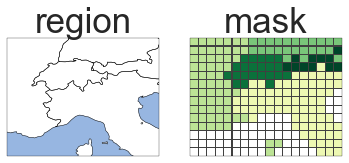

In [9]:
def plot():

    proj = ccrs.PlateCarree()
    #f, axes = plt.subplots(1, 2, subplot_kw=dict(projection=proj))

    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0], projection=proj, axisbg=[1, 0, 0])
    ax1 = plt.subplot(gs[1], projection=proj, axisbg=[1, 0, 0])


    # AXIS 0
    CH.plot(ax=ax0, add_label=False, coastlines=False, resolution='50m', line_kws=dict(lw=0.5))


    # AXIS 1

    mask.plot(ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree(), edgecolor='0.25', lw=0.05,
              cmap='YlGn_r')

    bounds = [4.51, 13.49, 42.02, 48.99]
    ax0.set_extent(bounds, ccrs.PlateCarree())
    ax1.set_extent(bounds, ccrs.PlateCarree())

    # despine
    #sns.despine(f, bottom=True, left=True)
    #axes[0].outline_patch.set_visible(False)
    #axes[1].outline_patch.set_visible(False)

    # title
    ax0.set_title('region', fontsize=35)
    ax1.set_title('mask',  fontsize=35)
    
plot()
plt.savefig('logo.png', dpi=150, bbox_inches='tight')